In [1]:
import os
import glob
import pandas as pd


In [3]:
import os

def explore_g2p2c_file_structure(base_path):
    """
    주어진 base_path 아래의 디렉터리를 재귀적으로 탐색하여,
    모든 CSV 파일(예: logs_worker_*.csv, *_episode_summary_*.csv 등)을 찾아
    경로를 출력하는 함수.

    예) base_path = '/home/eoeldroal/G2P2C/results/test'
    """

    csv_files = []

    # os.walk를 사용해 모든 하위 디렉터리를 검색
    for root, dirs, files in os.walk(base_path):
        for file_name in files:
            if file_name.lower().endswith('.csv'):
                full_path = os.path.join(root, file_name)
                csv_files.append(full_path)

    # 정렬 (디렉터리 / 파일명 기준)
    csv_files.sort()

    print(f"=== G2P2C CSV File Structure under: {base_path} ===")
    for csv_file in csv_files:
        # csv_file에서 base_path 뒤를 잘라내 경로 구조만 보여주기
        relative_path = os.path.relpath(csv_file, base_path)
        print(f"- {relative_path}")
    
    return csv_files

if __name__ == "__main__":
    # 테스트할 경로 예시. 상황에 맞춰 수정하세요.
    base_path = "/home/eoeldroal/G2P2C/results/test"
    
    print("## Exploring G2P2C File Structure...")
    csv_list = explore_g2p2c_file_structure(base_path)
    
    print(f"\n총 {len(csv_list)}개의 CSV 파일을 찾았습니다.")
    print("위 출력 결과를 확인 후, 필요한 파일들의 내부를 살펴보는 코드를 작성하면 됩니다.")


## Exploring G2P2C File Structure...
=== G2P2C CSV File Structure under: /home/eoeldroal/G2P2C/results/test ===
- aux_model_log.csv
- evaluation_log.csv
- experiment_summary.csv
- model_log.csv
- planning_model_log.csv
- testing/data/logs_worker_5000.csv
- testing/data/logs_worker_5001.csv
- testing/data/logs_worker_5002.csv
- testing/data/logs_worker_5003.csv
- testing/data/logs_worker_5004.csv
- testing/data/logs_worker_5005.csv
- testing/data/logs_worker_5006.csv
- testing/data/logs_worker_5007.csv
- testing/data/logs_worker_5008.csv
- testing/data/logs_worker_5009.csv
- testing/data/logs_worker_5010.csv
- testing/data/logs_worker_5011.csv
- testing/data/logs_worker_5012.csv
- testing/data/logs_worker_5013.csv
- testing/data/logs_worker_5014.csv
- testing/data/logs_worker_5015.csv
- testing/data/logs_worker_5016.csv
- testing/data/logs_worker_5017.csv
- testing/data/logs_worker_5018.csv
- testing/data/logs_worker_5019.csv
- testing/data/logs_worker_5020.csv
- testing/data/logs_worke

In [4]:
import os
import pandas as pd

def analyze_csv_files(csv_list, num_preview_rows=3):
    """
    주어진 CSV 파일 목록(csv_list)에 대하여,
    1) 파일명
    2) 파일 크기(행, 열)
    3) 칼럼명
    4) 상위 몇 행 미리보기(num_preview_rows) 
    등을 출력해 주는 함수.

    Args:
        csv_list (list): CSV 파일 경로들의 리스트
        num_preview_rows (int): 미리보기로 출력할 행 수
    """

    info_dict = {}  # 결과 저장용

    for csv_path in csv_list:
        if not os.path.exists(csv_path):
            print(f"[Warning] File does not exist: {csv_path}")
            continue
        
        print(f"\n=== Analyzing: {csv_path} ===")
        try:
            df = pd.read_csv(csv_path)
            shape_info = df.shape
            columns_info = df.columns.tolist()

            print(f" - Shape: {shape_info} (rows, columns)")
            print(f" - Columns: {columns_info}")

            if shape_info[0] > 0:
                print(f" - Preview (Top {num_preview_rows} rows):")
                print(df.head(num_preview_rows).to_string(index=False))
            else:
                print(" - This CSV is empty or has no rows.")

            # 분석 결과를 딕셔너리에 저장
            info_dict[csv_path] = {
                "shape": shape_info,
                "columns": columns_info,
                "preview": df.head(num_preview_rows)
            }

        except Exception as e:
            print(f"[Error] Failed to read {csv_path} due to {e}")
            info_dict[csv_path] = {"error": str(e)}

    return info_dict

if __name__ == "__main__":
    # 예시) 이전 단계에서 탐색한 CSV 목록을 가져왔다고 가정
    # (직접 csv_list 변수를 아래처럼 할당하시거나, 
    #  explore_g2p2c_file_structure(base_path) 호출 결과를 받아오면 됩니다.)
    csv_list = [
        "/home/eoeldroal/G2P2C/results/test/training/data/logs_worker_0.csv",
        "/home/eoeldroal/G2P2C/results/test/training/data/training_episode_summary_0.csv",
        "/home/eoeldroal/G2P2C/results/test/testing/data/logs_worker_5000.csv",
        "/home/eoeldroal/G2P2C/results/test/testing/data/testing_episode_summary_5000.csv",
        "/home/eoeldroal/G2P2C/results/test/aux_model_log.csv",
        # 필요에 따라 추가
    ]

    print("## Analyzing Selected CSV Files...\n")
    result_info = analyze_csv_files(csv_list, num_preview_rows=3)

    # 만약 분석 결과를 추후 활용하고 싶다면, info_dict를 pickling/JSON 저장 가능
    # 예: with open("csv_analysis.json", "w") as f: json.dump(result_info, f, indent=4)


## Analyzing Selected CSV Files...


=== Analyzing: /home/eoeldroal/G2P2C/results/test/training/data/logs_worker_0.csv ===
 - Shape: (5819, 13) (rows, columns)
 - Columns: ['epi', 't', 'cgm', 'meal', 'ins', 'rew', 'rl_ins', 'mu', 'sigma', 'prob', 'state_val', 'day_hour', 'day_min']
 - Preview (Top 3 rows):
epi   t       cgm meal         ins        rew      rl_ins           mu      sigma        prob  state_val day_hour day_min
1.0 0.0 151.05565  0.0  0.37621614 0.96969926  0.37621614  -0.04771653 0.49915493   -0.546726 0.08108237      0.0     0.0
1.0 1.0  150.2341  0.0 0.022219319 0.97081363 0.022219319 -0.047725372 0.49914187 -0.41239852 0.08112082      0.0     5.0
1.0 2.0 154.71141  0.0  0.14843397  0.9645649  0.14843397  -0.04772416  0.4991507 -0.28104275 0.08111277      0.0    10.0

=== Analyzing: /home/eoeldroal/G2P2C/results/test/training/data/training_episode_summary_0.csv ===
 - Shape: (107, 13) (rows, columns)
 - Columns: ['epi', 't', 'reward', 'normo', 'hypo', 'sev_hypo', 'hyp

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def extended_csv_analysis(csv_path, group_by=None, plot=False):
    """
    주어진 CSV 파일(csv_path)을 열어서,
    1) 숫자형 칼럼(numeric cols)에 대한 describe() 요약(평균,표준편차 등) 출력
    2) group_by 인자로 주어진 컬럼 기준으로 groupby 후 통계
    3) (선택) plot=True 시, 히스토그램 예시(plot_histograms 함수) 실행
    
    Args:
        csv_path (str): 분석할 CSV 파일 경로
        group_by (str): 특정 칼럼을 그룹화 기준으로 사용할 때 지정
        plot (bool): True면 간단히 히스토그램 시각화 예시 실행
    """
    if not os.path.exists(csv_path):
        print(f"[Error] File not found: {csv_path}")
        return

    print(f"\n=== Extended Analysis for: {csv_path} ===")
    df = pd.read_csv(csv_path)
    print(f"- Shape: {df.shape} (rows, cols)")
    print(f"- Columns: {list(df.columns)}")

    # 1) 숫자형 칼럼(numeric) 통계 요약
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) == 0:
        print("No numeric columns found.")
    else:
        desc = df[numeric_cols].describe()
        print("\n[Numeric Columns Summary Stats]")
        print(desc.to_string())

    # 2) group_by(그룹화) 예시
    if group_by and group_by in df.columns:
        print(f"\n[Group By '{group_by}'] => Mean values for numeric columns:")
        grouped_mean = df.groupby(group_by)[numeric_cols].mean()
        print(grouped_mean.head(10))  # 상위 10개 그룹만 예시
    
    # 3) (선택) plot=True 일 때, 간단히 히스토그램을 그려본다
    if plot and len(numeric_cols) > 0:
        plot_histograms(df[numeric_cols], csv_path)

def plot_histograms(df_num, title_prefix):
    """
    숫자형 데이터프레임(df_num)에 대해,
    각 컬럼별로 히스토그램을 그리는 간단한 예시 함수.
    """
    print(f"[Plotting Histograms for numeric columns in {title_prefix}...]")
    for col in df_num.columns:
        plt.figure()
        df_num[col].hist(bins=30)
        plt.title(f"{title_prefix} - {col} histogram")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

if __name__ == "__main__":
    # 예시) 분석 대상 CSV 파일
    csv_files = [
        "/home/eoeldroal/G2P2C/results/test/training/data/logs_worker_0.csv",
        "/home/eoeldroal/G2P2C/results/test/training/data/training_episode_summary_0.csv",
        "/home/eoeldroal/G2P2C/results/test/testing/data/logs_worker_5000.csv",
        "/home/eoeldroal/G2P2C/results/test/testing/data/testing_episode_summary_5000.csv",
    ]

    # 각 파일에 대해 확장 분석을 수행
    for csv_path in csv_files:
        extended_csv_analysis(csv_path, group_by='epi', plot=False)



=== Extended Analysis for: /home/eoeldroal/G2P2C/results/test/training/data/logs_worker_0.csv ===
- Shape: (5819, 13) (rows, cols)
- Columns: ['epi', 't', 'cgm', 'meal', 'ins', 'rew', 'rl_ins', 'mu', 'sigma', 'prob', 'state_val', 'day_hour', 'day_min']
No numeric columns found.

[Group By 'epi'] => Mean values for numeric columns:
Empty DataFrame
Columns: []
Index: [1.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]

=== Extended Analysis for: /home/eoeldroal/G2P2C/results/test/training/data/training_episode_summary_0.csv ===
- Shape: (107, 13) (rows, cols)
- Columns: ['epi', 't', 'reward', 'normo', 'hypo', 'sev_hypo', 'hyper', 'lgbi', 'hgbi', 'ri', 'sev_hyper', 'aBGP_rmse', 'cBGP_rmse']
No numeric columns found.

[Group By 'epi'] => Mean values for numeric columns:
Empty DataFrame
Columns: []
Index: [1, 10, 11, 12, 13, 14, 15, 16, 17, 18]

=== Extended Analysis for: /home/eoeldroal/G2P2C/results/test/testing/data/logs_worker_5000.csv ===
- Shape: (1652, 13) (rows, cols)
- Col


=== read_and_force_numeric ===
File: /home/eoeldroal/G2P2C/results/test/training/data/logs_worker_0.csv
Initial shape: (5819, 13)
Columns: ['epi', 't', 'cgm', 'meal', 'ins', 'rew', 'rl_ins', 'mu', 'sigma', 'prob', 'state_val', 'day_hour', 'day_min']
Preview:
    epi    t        cgm meal          ins         rew       rl_ins            mu       sigma         prob   state_val day_hour day_min
0  1.0  0.0  151.05565  0.0   0.37621614  0.96969926   0.37621614   -0.04771653  0.49915493    -0.546726  0.08108237      0.0     0.0
1  1.0  1.0   150.2341  0.0  0.022219319  0.97081363  0.022219319  -0.047725372  0.49914187  -0.41239852  0.08112082      0.0     5.0
2  1.0  2.0  154.71141  0.0   0.14843397   0.9645649   0.14843397   -0.04772416   0.4991507  -0.28104275  0.08111277      0.0    10.0

[After forced numeric conversion, dtypes]
epi          float64
t            float64
cgm          float64
meal         float64
ins          float64
rew          float64
rl_ins       float64
mu           

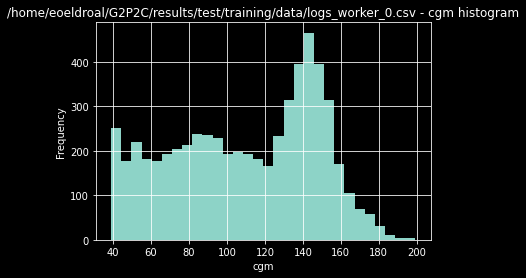


=== read_and_force_numeric ===
File: /home/eoeldroal/G2P2C/results/test/training/data/training_episode_summary_0.csv
Initial shape: (107, 13)
Columns: ['epi', 't', 'reward', 'normo', 'hypo', 'sev_hypo', 'hyper', 'lgbi', 'hgbi', 'ri', 'sev_hyper', 'aBGP_rmse', 'cBGP_rmse']
Preview:
   epi   t     reward              normo                hypo           sev_hypo hyper       lgbi       hgbi         ri sev_hyper  aBGP_rmse  cBGP_rmse
0   1  43  24.615875  79.06976744186046  11.627906976744185   9.30232558139535   0.0  13.636328  2.1380825   15.77441       0.0  224.83452  242.63388
1   2  36  18.842514  86.11111111111111   5.555555555555555  8.333333333333334   0.0  15.125556  0.6578093  15.783365       0.0  233.11009   245.2329
2   3  37  18.119415  70.27027027027027   10.81081081081081  18.91891891891892   0.0  16.119402  2.6040454  18.723448       0.0  239.48602  242.49706

[After forced numeric conversion, dtypes]
epi          float64
t            float64
reward       float64
normo     

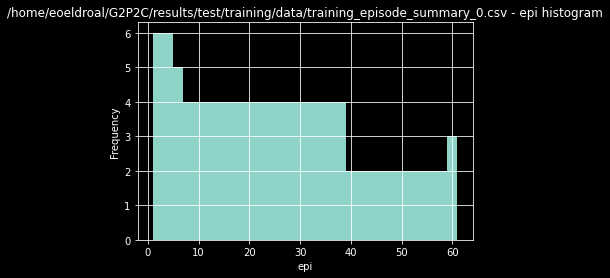


=== read_and_force_numeric ===
File: /home/eoeldroal/G2P2C/results/test/testing/data/logs_worker_5000.csv
Initial shape: (1652, 13)
Columns: ['epi', 't', 'cgm', 'meal', 'ins', 'rew', 'rl_ins', 'mu', 'sigma', 'prob', 'state_val', 'day_hour', 'day_min']
Preview:
    epi    t         cgm meal           ins         rew        rl_ins           mu       sigma         prob   state_val day_hour day_min
0  2.0  0.0  116.651085  0.0   0.095850594  0.99954736   0.095850594  -0.07429313   0.4979484  -0.23648739  -2.0571804      0.0     0.0
1  2.0  1.0    114.0311  0.0  0.0059807273  0.99993795  0.0059807273  -0.07428045  0.49795136    -0.966821  -2.0568738      0.0     5.0
2  2.0  2.0  112.631836  0.0    0.20744596  0.99999964    0.20744596  -0.07426128  0.49796915  -0.37831676  -2.0582566      0.0    10.0

[After forced numeric conversion, dtypes]
epi          float64
t            float64
cgm          float64
meal         float64
ins          float64
rew          float64
rl_ins       float64
mu 

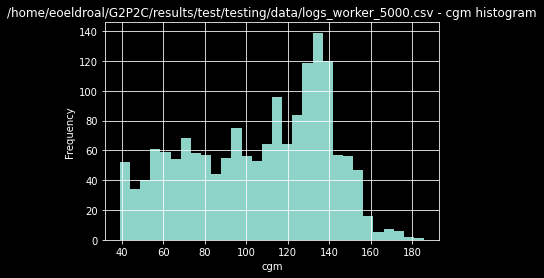


=== read_and_force_numeric ===
File: /home/eoeldroal/G2P2C/results/test/testing/data/testing_episode_summary_5000.csv
Initial shape: (25, 13)
Columns: ['epi', 't', 'reward', 'normo', 'hypo', 'sev_hypo', 'hyper', 'lgbi', 'hgbi', 'ri', 'sev_hyper', 'aBGP_rmse', 'cBGP_rmse']
Preview:
   epi   t     reward              normo                hypo           sev_hypo hyper       lgbi       hgbi         ri sev_hyper  aBGP_rmse  cBGP_rmse
0   2  33  15.988846  84.84848484848484  6.0606060606060606  9.090909090909092   0.0   9.886445  0.5370636  10.423509       0.0  238.38847  249.39612
1   3  53  33.763924  84.90566037735849   5.660377358490566  9.433962264150944   0.0  13.023078   3.635047  16.658125       0.0  267.16946  238.96667
2   4  47   28.84798  78.72340425531915  14.893617021276595  6.382978723404255   0.0  7.7949877  0.7280266   8.523014       0.0  250.01834  223.30188

[After forced numeric conversion, dtypes]
epi          float64
t            float64
reward       float64
normo     

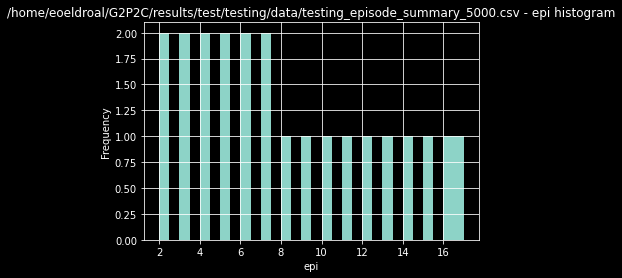

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_and_force_numeric(csv_path, verbose=True):
    """
    1) CSV 파일을 읽은 뒤, 모든 칼럼에 대해 문자열 제거/정제 후,
       pd.to_numeric(errors='coerce')를 수행해 float 변환을 시도.
    2) 변환 실패 시 해당 칼럼 값이 NaN으로 바뀌며, NaN 통계를 출력.
    3) 변환 성공 시 dtypes가 float64 등으로 정상 표기됨.
    """
    if not os.path.exists(csv_path):
        print(f"[Error] File not found: {csv_path}")
        return None

    # 우선 CSV 전체를 일반적 방식으로 읽는다.
    df = pd.read_csv(csv_path, dtype=str)  # dtype=str로 전부 문자열로 읽어온 뒤
                                           # 아래 단계에서 직접 float 변환 시도
    if verbose:
        print(f"\n=== read_and_force_numeric ===\nFile: {csv_path}")
        print(f"Initial shape: {df.shape}")
        print("Columns:", list(df.columns))
        print("Preview:\n", df.head(3).to_string())

    # 문자형 칼럼을 전부 순회하며 strip & to_numeric 시도
    for col in df.columns:
        # 1) 공백 제거
        df[col] = df[col].str.strip()
        # 2) 빈 문자열("")을 NaN으로 변환
        df[col].replace('', np.nan, inplace=True)
        # 3) float 변환 (실패 시 NaN)
        df[col] = pd.to_numeric(df[col], errors='coerce')

    if verbose:
        print("\n[After forced numeric conversion, dtypes]")
        print(df.dtypes)
        # NaN 개수가 0이 아닌 칼럼이 있는지 확인
        nan_count = df.isna().sum()
        nan_cols = nan_count[nan_count > 0]
        if not nan_cols.empty:
            print("\n[NaN counts in columns]\n", nan_cols)

    return df

def extended_numeric_analysis(df, csv_path, group_col='epi'):
    """
    1) df 중 숫자형 칼럼만 골라 describe() 출력.
    2) group_col 로 그룹화해 평균 등 통계치.
    3) 간단히 히스토그램 예시.
    """
    # 숫자형 칼럼만 추출
    num_cols = df.select_dtypes(include=[np.number]).columns
    if len(num_cols) == 0:
        print(f"[Error] No numeric columns found in {csv_path} even after force conversion.")
        return

    print(f"\n=== extended_numeric_analysis: {csv_path} ===")
    print("\n[Numeric columns]", list(num_cols))

    # describe() 요약
    desc = df[num_cols].describe()
    print("\n[describe() stats]\n", desc)

    # epi 단위로 groupby 예시
    if group_col in df.columns:
        grouped = df.groupby(group_col)[num_cols].mean()
        print(f"\n[Group by '{group_col}': mean values of numeric cols - top 5 groups]")
        print(grouped.head(5))

    # 간단히 한두 개 칼럼만 히스토그램 예시
    # (모든 칼럼 그리면 너무 많을 수 있으니, 필요한 칼럼 이름만)
    sample_col = 'cgm' if 'cgm' in num_cols else num_cols[0]
    print(f"\nSample histogram for '{sample_col}' column:")
    df[sample_col].hist(bins=30)
    plt.title(f"{csv_path} - {sample_col} histogram")
    plt.xlabel(sample_col)
    plt.ylabel("Frequency")
    plt.show()

if __name__ == "__main__":
    test_files = [
        "/home/eoeldroal/G2P2C/results/test/training/data/logs_worker_0.csv",
        "/home/eoeldroal/G2P2C/results/test/training/data/training_episode_summary_0.csv",
        "/home/eoeldroal/G2P2C/results/test/testing/data/logs_worker_5000.csv",
        "/home/eoeldroal/G2P2C/results/test/testing/data/testing_episode_summary_5000.csv"
    ]

    for fpath in test_files:
        df_numeric = read_and_force_numeric(fpath, verbose=True)
        if df_numeric is not None and not df_numeric.empty:
            extended_numeric_analysis(df_numeric, fpath, group_col='epi')
